# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


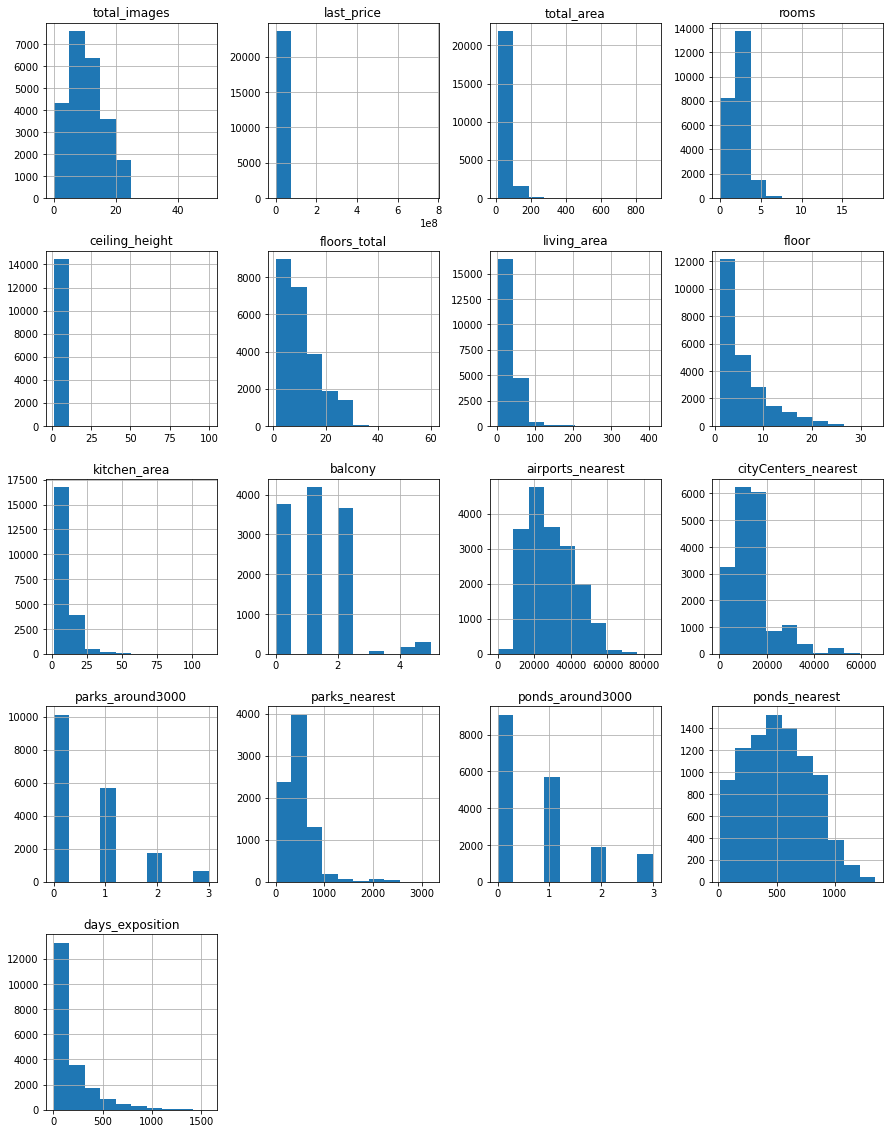

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.hist(figsize=(15, 20));
data

Вывод: по результатам рассмотрения исходной базы данных можно сделать выводы:
        - формат даты не отображает времени
        - в столбце ceiling_height, balcony, is_apartment, ponds_nearest, parks_nearest, days_exposition, kitchen_area имеются пропуски
        - в столбце floors_total формат float64, а данные предполагают целочисленное отображение

### Предобработка данных

In [2]:
#выведем количество ячеек с нулевыми значениями в столбцах датафрейма
display(data.isna().sum())


#нулевые значения в столбце 'is_apartment' заменим на 'False'
data['is_apartment']=data['is_apartment'].fillna(False)

#заполним нулевые значения
data['balcony']=data['balcony'].fillna(0)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод: столбец is_apartment логического типа, поэтому пропущенные значения заменены на False.
Столбцы kitchen_area,balcony с промущенными значениями из-за отсутствия кухни и балконов соответственно. 
Столбцы cityCenters_nearest, airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
c пропущенными значениями из-за нахождения в центре недвижимости, отсутствия аэропорта вблизи, парков в радиусе 3 км, прудов. Характер ошибки для столбца days_exposition наиболее вероятен из-за того, что квартиру ввели в базу, но не выставили на продажу по неясным причинам.

In [3]:
#формат даты без указания времени. Необходимо скорректировать в формат г.м.д
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

#Для некоторых столбцов, отображающих количество, скорректируем формат в int 
data['balcony'] = np.floor(pd.to_numeric(data['balcony'], errors='coerce')).astype('Int64')
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], errors='coerce')).astype('Int64')
data['ponds_around3000'] = np.floor(pd.to_numeric(data['ponds_around3000'], errors='coerce')).astype('Int64')
data['floors_total'] = np.floor(pd.to_numeric(data['floors_total'], errors='coerce')).astype('Int64')

#удалим дубликаты

data.dropna(subset=['floors_total'], inplace=True)
data['floors_total']=data['floors_total'].astype('int')


Вывод: Формат даты указан без значений времени. Переведен формат для удобство восприятия в г.м.д
Данные в столбцах balcony,parks_around3000, ponds_around3000, floors_total предполагают количественное отображение балконов, парков, прудов, этажей, поэтому логичнее перевести формат ячеек в int

In [4]:
def ceil(row):
    if row['ceiling_height']>14:
        return row['ceiling_height']/10
    else:
        return row['ceiling_height']
data['ceiling_height'] = data.apply(ceil, axis=1)


def quart(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    total = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return total

column_anomaly = ['last_price', 'total_area', 'rooms']
for col in column_anomaly:
    data[col] = quart(data, col)
data['locality_name'].nunique()

364

Вывод: Высота потолков в некоторых строках более 14 м. Написана функция, возвращающая значения в столбец ceiling_height, которые более 14 м, деленные на 10. Аномальные выбросы данных удалены по 1,5 размаху в столбцах со стоимостью квартиры, количеством комнат и общей площадью

In [5]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('деревня ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('поселок ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('село ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('станции ',
                                                        '',
                                                        case = False)
data['locality_name'] = data['locality_name'].str.replace('коттеджный ',
                                                        '',
                                                        case = False)
data.drop_duplicates()
data.dropna(subset=['locality_name'], inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

In [6]:
#расчет стоимость одного квадратного метра
data['price_per_square_meter']=data['last_price']/data['total_area']
#добавление дня недели, месяца,года публикации объявления в датафрейм
data['weekday']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year
#функция по определению этажности
def class_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#Добавление типа этажности и растояния до центра города в км
data['type_of_floor'] = data.apply(class_of_floor, axis=1)
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(0)
data['cityCenters_nearest_km']=round((data['cityCenters_nearest']/1000),0).astype('int')

### Проведите исследовательский анализ данных

4.1 Изучение параметров объектов (построение гистограмм)

<AxesSubplot:title={'center':'Месяц публикации объявления'}, ylabel='Frequency'>

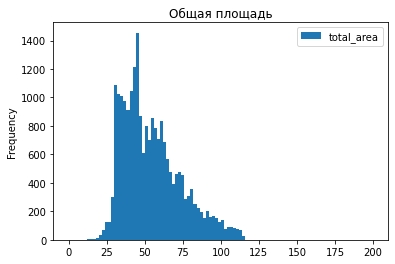

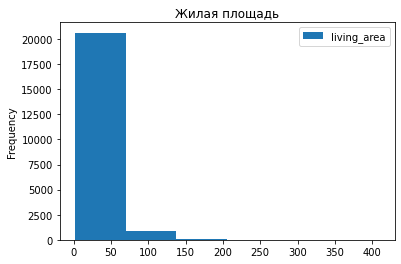

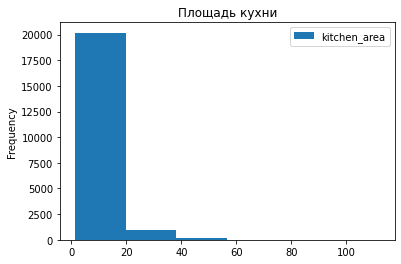

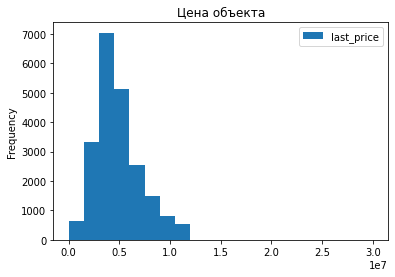

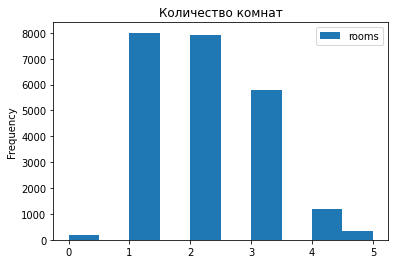

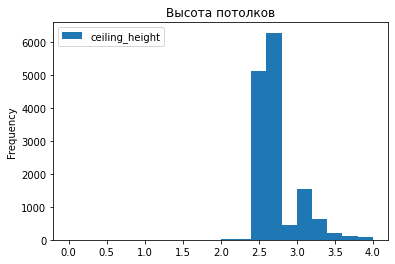

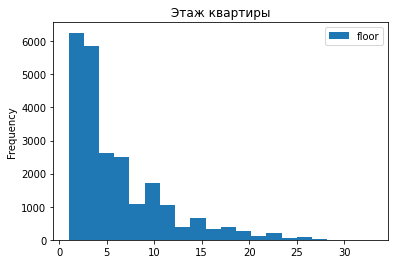

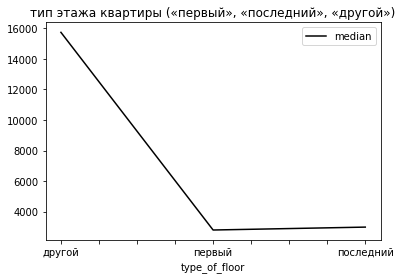

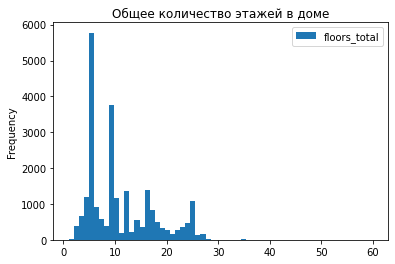

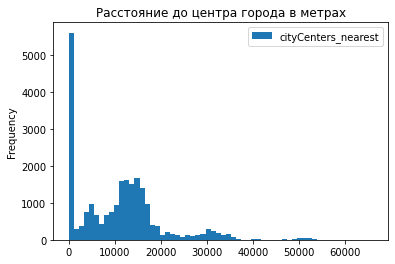

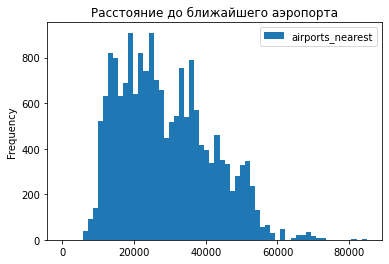

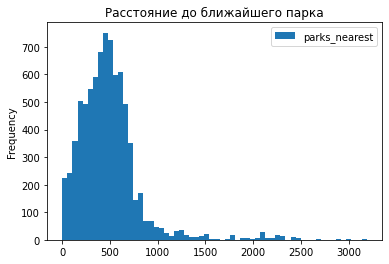

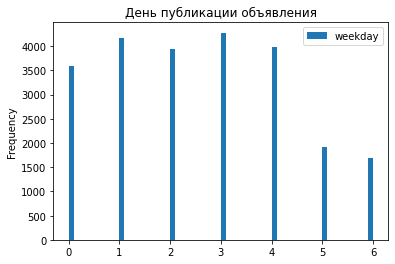

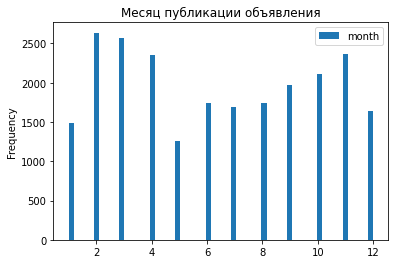

In [7]:
data.plot(kind='hist', y='total_area',title='Общая площадь', bins=100,range=(0,200))
data.plot(kind='hist', y='living_area',title='Жилая площадь', bins=6)
data.plot(kind='hist', y='kitchen_area',title='Площадь кухни', bins=6)
data.plot(kind='hist', y='last_price',title='Цена объекта', bins=20,range=(0,30000000) )
data.plot(kind='hist', y='rooms',title='Количество комнат', bins=10)
data.plot(kind='hist', y='ceiling_height',title='Высота потолков', bins=20,range=(0,4)) 
data.plot(kind='hist', y='floor',title='Этаж квартиры', bins=20)
price_rooms=data.pivot_table(index='type_of_floor', values='last_price', aggfunc='count')
price_rooms.columns=['median']
price_rooms.plot(y='median', style='-0',title='тип этажа квартиры («первый», «последний», «другой»)')
data.plot(kind='hist', y='floors_total',title='Общее количество этажей в доме', bins=60)
data.plot(kind='hist', y='cityCenters_nearest',title='Расстояние до центра города в метрах', bins=60)
data.plot(kind='hist', y='airports_nearest',title='Расстояние до ближайшего аэропорта', bins=60)
data.plot(kind='hist', y='parks_nearest',title='Расстояние до ближайшего парка', bins=60)
data.plot(kind='hist', y='weekday',title='День публикации объявления', bins=60)
data.plot(kind='hist', y='month',title='Месяц публикации объявления', bins=60)

Изучены и построены гистограммы для следующих параметров объектов: 

общая площадь- по графику можно сделать вывод, что средняя площадь квартиры 52 м.кв.

жилая площадь-результат аналогичен данным по общей площади

площадь кухни-наиболее часто площадь кухни составляет (0-20 кв.м)

цена объекта-наиболее часто встречаются квартиры стоимостью до 10 млн.руб.

количество комнат- согласно гистограмме,основная доля продаваемых квартир-двухкомнатные 

высота потолков-диапазон наиболее часто встречающихся 2,5:3,5

этаж квартиры-этажность свидетельствует о преобладании 10 и менее этажных домов

тип этажа квартиры («первый», «последний», «другой»)-последних и первых этажей в выборке значительно меньше остальных

общее количество этажей в доме-этажность свидетельствует о преобладании 10 и менее этажных домов

расстояние до центра города в метрах-основная масса недвижимости сосредоточена в радиусе 20 км

расстояние до ближайшего аэропорта-расстояние до аэропорта от 0 до 60 км

расстояние до ближайшего парка-парки, при наличии, расположены на расстоянии до 1 км

день и месяц публикации объявления-обьявления публикуются в будние дни больше,а в летний месяцы меньше

4.2 Изучение времени продажи квартиры

'Среднее время продажи квартиры: 180.7413945278023'

'Медиана времени продажи квартиры: 95.0'

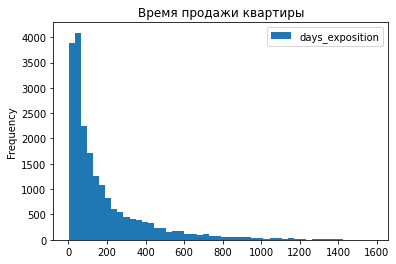

In [8]:
#Анализ времени продажи квартиры
data.plot(kind='hist', y='days_exposition',title='Время продажи квартиры', bins=50)
display('Среднее время продажи квартиры: {}'.format(data['days_exposition'].mean()))
display('Медиана времени продажи квартиры: {}'.format(data['days_exposition'].median()))

Вывод:В виду того, что в выборке медиана составляет 73 дня, можно сделать вывод, что если длительность размещения обьявления менее 73 дней, продажу считаем быстрой

4.3 Оценка влияния факторов на общую (полную стоимость объекта)

'Коэффициент корреляции для стоимости квадратного метра от общей площади'

0.7790658122333597

'Коэффициент корреляции для стоимости квадратного метра от жилой площади'

0.6650563050663457

'Коэффициент корреляции для стоимости квадратного метра от площади кухни'

0.5461381770667585

'Коэффициент корреляции для стоимости квадратного метра от количества комнат'

0.5647311325004367

<AxesSubplot:title={'center':'Зависимость цены квартиры от года размещения'}, xlabel='year'>

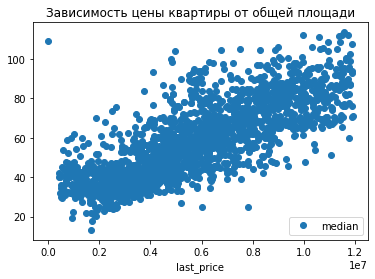

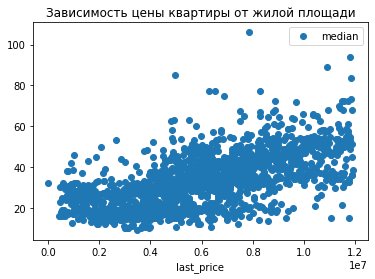

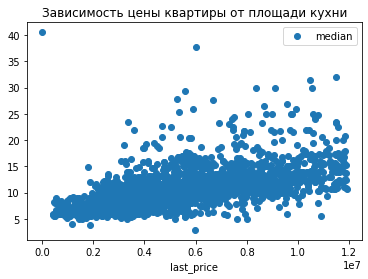

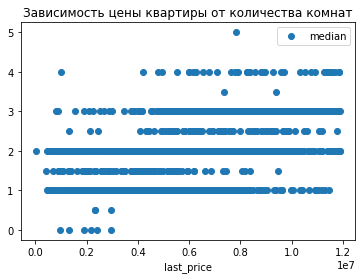

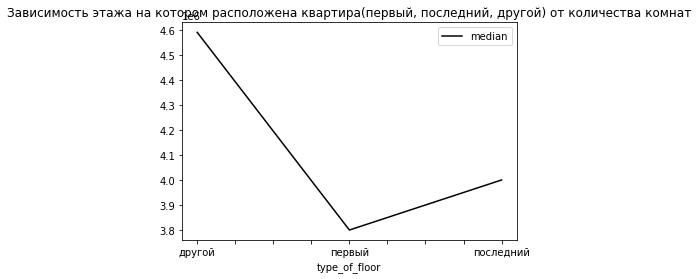

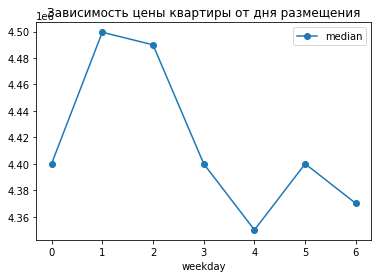

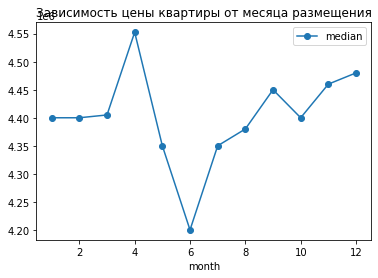

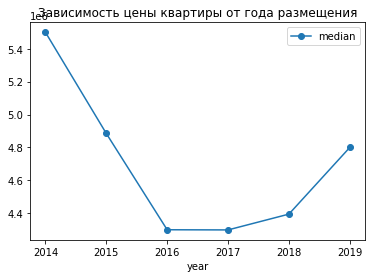

In [9]:

price_area=data.pivot_table(index='last_price', values='total_area', aggfunc='median')
price_area.columns=['median']
price_area.plot(y='median', style='o',title='Зависимость цены квартиры от общей площади')
price_area=price_area.reset_index()
display('Коэффициент корреляции для стоимости квадратного метра от общей площади',price_area['last_price'].corr(price_area['median']))


price_living_area=data.pivot_table(index='last_price', values='living_area', aggfunc='median')
price_living_area.columns=['median']
price_living_area.plot(y='median', style='o',title='Зависимость цены квартиры от жилой площади')
price_living_area=price_living_area.reset_index()
display('Коэффициент корреляции для стоимости квадратного метра от жилой площади',price_living_area['last_price'].corr(price_living_area['median']))


price_kitchen_area=data.pivot_table(index='last_price', values='kitchen_area', aggfunc='median')
price_kitchen_area.columns=['median']
price_kitchen_area.plot(y='median', style='o',title='Зависимость цены квартиры от площади кухни')
price_kitchen_area=price_kitchen_area.reset_index()
display('Коэффициент корреляции для стоимости квадратного метра от площади кухни',price_kitchen_area['last_price'].corr(price_kitchen_area['median']))


price_rooms=data.pivot_table(index='last_price', values='rooms', aggfunc='median')
price_rooms.columns=['median']
price_rooms.plot(y='median', style='o',title='Зависимость цены квартиры от количества комнат')
price_rooms=price_rooms.reset_index()
display('Коэффициент корреляции для стоимости квадратного метра от количества комнат',price_rooms['last_price'].corr(price_rooms['median']))



price_rooms=data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median')
price_rooms.columns=['median']
price_rooms.plot(y='median', style='-0',title='Зависимость этажа на котором расположена квартира(первый, последний, другой) от количества комнат')


price_weekday=data.pivot_table(index='weekday', values='last_price', aggfunc='median')
price_weekday.columns=['median']
price_weekday.plot(y='median', style='-o',title='Зависимость цены квартиры от дня размещения')

price_month=data.pivot_table(index='month', values='last_price', aggfunc='median')
price_month.columns=['median']
price_month.plot(y='median', style='-o',title='Зависимость цены квартиры от месяца размещения')

price_year=data.pivot_table(index='year', values='last_price', aggfunc='median')
price_year.columns=['median']
price_year.plot(y='median', style='-o',title='Зависимость цены квартиры от года размещения')

Вывод: Наиболее заметная зависимость межде ценой и следующими параметрами:

Общая площадь-коэффициент корреляции для стоимости квадратного метра от общей площади 0.6885562309174611

Жилая площадь- коэффициент корреляции для стоимости квадратного метра от жилой площади 0.635448770208018

Площадь кухни- коэффициент корреляции для стоимости квадратного метра от площади кухни 0.5816189445354518

Количество комнат- коэффициент корреляции для стоимости квадратного метра от количества комнат 0.4419359581709397

Этажность- дешевле квартиры на первом и последних этажах

Квартиры в начале неделя размещаются с большей величиной стоимости, чем в конце недели

Месяц размещения: стоимость выше в апреле, а самая низкая в июне

Год размещения: прослеживается падение стоимости квартир до 2017 года. Далее идет рост стоимости

4.4 Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [10]:
price_total=data.pivot_table(index='locality_name', values='last_price', aggfunc=['median','mean','count'])
price_total.columns=['median','mean','count']
price_total=price_total.sort_values(by='count', ascending=False)
price_total_top_10=price_total.iloc[[0,1,2,3,4,5,6,7,8,9]]
display(price_total_top_10)
display('Средняя стоимость одного квадратного метра',round(price_total_top_10['median'].mean(),1))

price_max=price_total_top_10['mean'].max()
price_min=price_total_top_10['mean'].min()
display('Населенный пункт с самой высокой стоимостью квадратного метра', price_total_top_10.query('mean==@price_max'))
display('Населенный пункт с самой низкой стоимостью квадратного метра', price_total_top_10.query('mean==@price_min'))    

,median,mean,count
locality_name,,,
Санкт-Петербург,5150000.0,5.664535e+06,13679
посёлок Мурино,3400000.0,3.671211e+06,520
Кудрово,3875000.0,4.318378e+06,468
посёлок Шушары,3950000.0,4.109809e+06,439
Всеволожск,3450000.0,3.737119e+06,397
Пушкин,4970000.0,5.334385e+06,338
Колпино,3600000.0,3.839849e+06,336
посёлок Парголово,4100000.0,4.488075e+06,327
Гатчина,3090000.0,3.423998e+06,305


'Средняя стоимость одного квадратного метра'

3845850.0

'Населенный пункт с самой высокой стоимостью квадратного метра'

,median,mean,count
locality_name,,,
Санкт-Петербург,5150000.0,5.664535e+06,13679


'Населенный пункт с самой низкой стоимостью квадратного метра'

,median,mean,count
locality_name,,,
Выборг,2873500.0,3.180055e+06,236


4.5 Расчет стоимости каждого километра при отдаленности от центра Санкт-Петербурга

,cityCenters_nearest_km,median,mean,count
0,0,111050.783950,121525.413475,50
1,1,114228.723404,122076.368924,95
2,2,112307.692308,116427.366314,169
3,3,105250.000000,110202.407357,236
4,4,110958.904110,116456.849611,433
5,5,117391.304348,121135.474717,573
6,6,117985.611511,122722.472000,403
7,7,113686.534216,116559.983829,285
8,8,113911.657559,115926.675728,464
9,9,103448.275862,106355.439348,519


'Коэффициент корреляции для стоимости квадратного метра от удаленности от центра'

-0.912304586470894

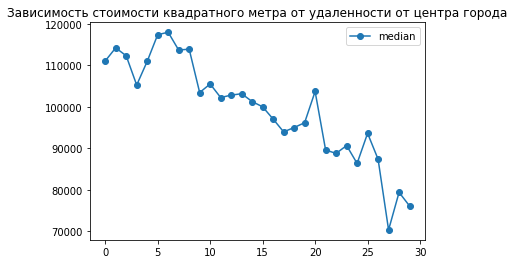

In [11]:
km_spb=data.query('locality_name=="Санкт-Петербург"')
price_spb_km=km_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc=['median','mean','count'])
price_spb_km.columns=['median','mean','count']
price_spb_km=price_spb_km.reset_index()
display(price_spb_km)
price_spb_km.plot(y='median', style='-o',title='Зависимость стоимости квадратного метра от удаленности от центра города')
display('Коэффициент корреляции для стоимости квадратного метра от удаленности от центра',price_spb_km['cityCenters_nearest_km'].corr(price_spb_km['median']))


Вывод: согласно построенного графика и коэффициента корреляции, можно сделать вывод о том, что с удалением от центра стоимость недвижимости уменьшается. 

### Общий вывод

Согласно задания были изучены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По результатам рассмотрения исходной базы данных можно сделать выводы:

формат даты не отображает времени

в столбцах ceiling_height, balcony, is_apartment, ponds_nearest, parks_nearest, days_exposition, kitchen_area имеются пропуски

в столбце floors_total формат float64, а данные предполагают целочисленное отображение

столбец is_apartment логического типа, поэтому пропущенные значения заменены на False.

Столбцы kitchen_area,balcony с промущенными значениями из-за отсутствия кухни и балконов соответственно. 

Столбцы cityCenters_nearest, airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
c пропущенными значениями из-за нахождения в центре недвижимости, отсутствия аэропорта вблизи, парков в радиусе 3 км, прудов. 

Характер ошибки для столбца days_exposition наиболее вероятен из-за того, что квартиру ввели в базу, но не выставили на продажу по неясным причинам.

Формат даты указан без значений времени. Переведен формат для удобство восприятия в г.м.д

Данные в столбцах balcony,parks_around3000, ponds_around3000, floors_total предполагают количественное отображение балконов, парков, прудов, этажей, поэтому логичнее перевести формат ячеек в int

Высота потолков в некоторых строках более 14 м. Написана функция, возвращающая значения в столбец ceiling_height, которые более 14 м, деленные на 10. Аномальные выбросы данных удалены по 1,5 размаху в столбцах со стоимостью квартиры, количеством комнат и общей площадью

Изучены и построены гистограммы для следующих параметров объектов: 

общая площадь- по графику можно сделать вывод, что средняя площадь квартиры 52 м.кв.

жилая площадь-результат аналогичен данным по общей площади

площадь кухни-наиболее часто площадь кухни составляет (0-20 кв.м)

цена объекта-наиболее часто встречаются квартиры стоимостью до 10 млн.руб.

количество комнат- согласно гистограмме,основная доля продаваемых квартир-двухкомнатные 

высота потолков-диапазон наиболее часто встречающихся 2,5:3,5

этаж квартиры-этажность свидетельствует о преобладании 10 и менее этажных домов

тип этажа квартиры («первый», «последний», «другой»)-последних и первых этажей в выборке значительно меньше остальных

общее количество этажей в доме-этажность свидетельствует о преобладании 10 и менее этажных домов

расстояние до центра города в метрах-основная масса недвижимости сосредоточена в радиусе 20 км

расстояние до ближайшего аэропорта-расстояние до аэропорта от 0 до 60 км

расстояние до ближайшего парка-парки, при наличии, расположены на расстоянии до 1 км

день и месяц публикации объявления-обьявления публикуются в будние дни больше,а в летний месяцы меньше


В виду того, что в выборке длительности продажи медиана составляет 73 дня, можно сделать вывод, что если длительность размещения объявления менее 73 дней, продажу считаем быстрой


Наиболее заметная зависимость между ценой недвижимости и следующими параметрами:

Общая площадь-коэффициент корреляции для стоимости квадратного метра от общей площади 0.6885562309174611

Жилая площадь- коэффициент корреляции для стоимости квадратного метра от жилой площади 0.635448770208018

Площадь кухни- коэффициент корреляции для стоимости квадратного метра от площади кухни 0.5816189445354518

Количество комнат- коэффициент корреляции для стоимости квадратного метра от количества комнат 0.4419359581709397

Этажность- дешевле квартиры на первом и последних этажах

Квартиры в начале неделя размещаются с большей величиной стоимости, чем в конце недели

Месяц размещения: стоимость выше в апреле, а самая низкая в июне

Год размещения: прослеживается падение стоимости квартир до 2017 года. Далее идет рост стоимости

Согласно построенного графика и коэффициента корреляции, можно сделать вывод о том, что с удалением от центра стоимость недвижимости уменьшается.
